<div class="alert alert-info alert-info"><b><h1>EXERCICI 1</h1></b>
    
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.
    
</div>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
import xgboost as xgb

<div class="alert alert-info alert-info"><b><h1>Recopilación de datos</h1></b>

En un vistazo previo al fichero de datos, podemos ver que los datos no tienen encabezados, por lo que cargamos los datos y asignamos las columnas en el orden que vienen relacionadas en la descripción del dataset.
    
</div>

In [2]:
# Cargamos los datos del archivo en un Dataframe y asignamos nombre a las columnas.
df_wine = pd.read_csv('wineData.txt', header=None)
df_wine.columns = ['class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<div class="alert alert-info alert-info"><b><h1>Limpieza de datos</h1></b>

Examinamos los datos en busca de errores, valores atípicos o faltantes.
    
</div>

In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [4]:
# Vemos los valores únicos de cada uno de los atributos
df_wine.nunique()

class                             3
Alcohol                         126
Malic acid                      133
Ash                              79
Alcalinity of ash                63
Magnesium                        53
Total phenols                    97
Flavanoids                      132
Nonflavanoid phenols             39
Proanthocyanins                 101
Color intensity                 132
Hue                              78
OD280/OD315 of diluted wines    122
Proline                         121
dtype: int64

In [5]:
df_wine.shape

(178, 14)

In [6]:
# Comprobamos si hay campos con valor núlo
df_wine.isnull().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
#Comprobamos si hay campos con valor NaN
df_wine.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
df_wine.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.94,0.78,1.00,1.00,2.00,3.00,3.00
Alcohol,178.0,13.00,0.81,11.03,12.36,13.05,13.68,14.83
Malic acid,178.0,2.34,1.12,0.74,1.60,1.87,3.08,5.80
Ash,178.0,2.37,0.27,1.36,2.21,2.36,2.56,3.23
Alcalinity of ash,178.0,19.49,3.34,10.60,17.20,19.50,21.50,30.00
Magnesium,178.0,99.74,14.28,70.00,88.00,98.00,107.00,162.00
Total phenols,178.0,2.30,0.63,0.98,1.74,2.36,2.80,3.88
Flavanoids,178.0,2.03,1.00,0.34,1.20,2.13,2.88,5.08
Nonflavanoid phenols,178.0,0.36,0.12,0.13,0.27,0.34,0.44,0.66
Proanthocyanins,178.0,1.59,0.57,0.41,1.25,1.56,1.95,3.58


<div class="alert alert-info alert-info"><b><h1>Exploración de datos</h1></b>

Realizamos un análisis exploratorio de los datos para comprender su distribución, relaciones y características.   

</div>

<div class="alert alert-info alert-info">


  Información de los campos y descripción de los valores más carácterísticos:

  * **Alcohol**: El porcentaje de alcohol presente en el vino. Es un componente clave que influye en el sabor, la sensación en                  la boca y la estructura del vino.

  * **Malic acid**: El ácido málico presente en el vino. Contribuye a la acidez total del vino y puede afectar su sabor y                           equilibrio.

  * **Ash**:  La cantidad de residuo mineral inorgánico que queda después de quemar el vino. Este valor está relacionado con                 los minerales presentes en el vino.

  * **Alcalinity of ash**: La medida de la alcalinidad del residuo mineral. Indica la capacidad del vino para resistir cambios                            en la acidez debido a la presencia de sales alcalinas.

  * **Magnesium**: La cantidad de magnesio presente en el vino. El magnesio es un mineral que puede afectar el sabor y la                          textura del vino.

  * **Total phenols**: La concentración total de fenoles en el vino. Los fenoles son compuestos químicos que se encuentran en                          las uvas y pueden afectar el color, sabor y estructura del vino.

  * **Flavanoids**: Los flavonoides son un tipo de fenoles presentes en el vino. Contribuyen al color, sabor y propiedades                         antioxidantes del vino.

  * **Nonflavanoid phenols**: Los fenoles no flavonoides son otro tipo de fenoles presentes en el vino, distintos de los                                     flavonoides. También pueden contribuir al color, sabor y estructura del vino.

  * **Proanthocyanins**: Los proantocianidinos son otro tipo de compuesto fenólico presente en el vino. Son responsables de la                          astringencia y pueden tener propiedades antioxidantes.

  * **Color intensity**: La intensidad del color del vino. Puede ser influenciada por la concentración de pigmentos en las uvas                          y el proceso de vinificación.

  * **Hue**: El tono del color del vino. Puede describir si el vino tiene tonos más azulados, violetas, anaranjados, etc.

  * **OD280/OD315 of diluted wines**: La relación entre la absorbancia de la luz a 280 nm y 315 nm en los vinos diluidos. Puede                                       proporcionar información sobre la concentración de compuestos fenólicos y la edad del                                           vino.

  * **Proline**: La cantidad de prolina presente en el vino. La prolina es un aminoácido que puede contribuir al sabor y aroma                  del vino.
  
  Tenemos 13 atributos de tipo continuo independientes y nuestra variable objetivo es la clasificación del mismo **class**       con los valores 1, 2 o 3.
    
  </div>

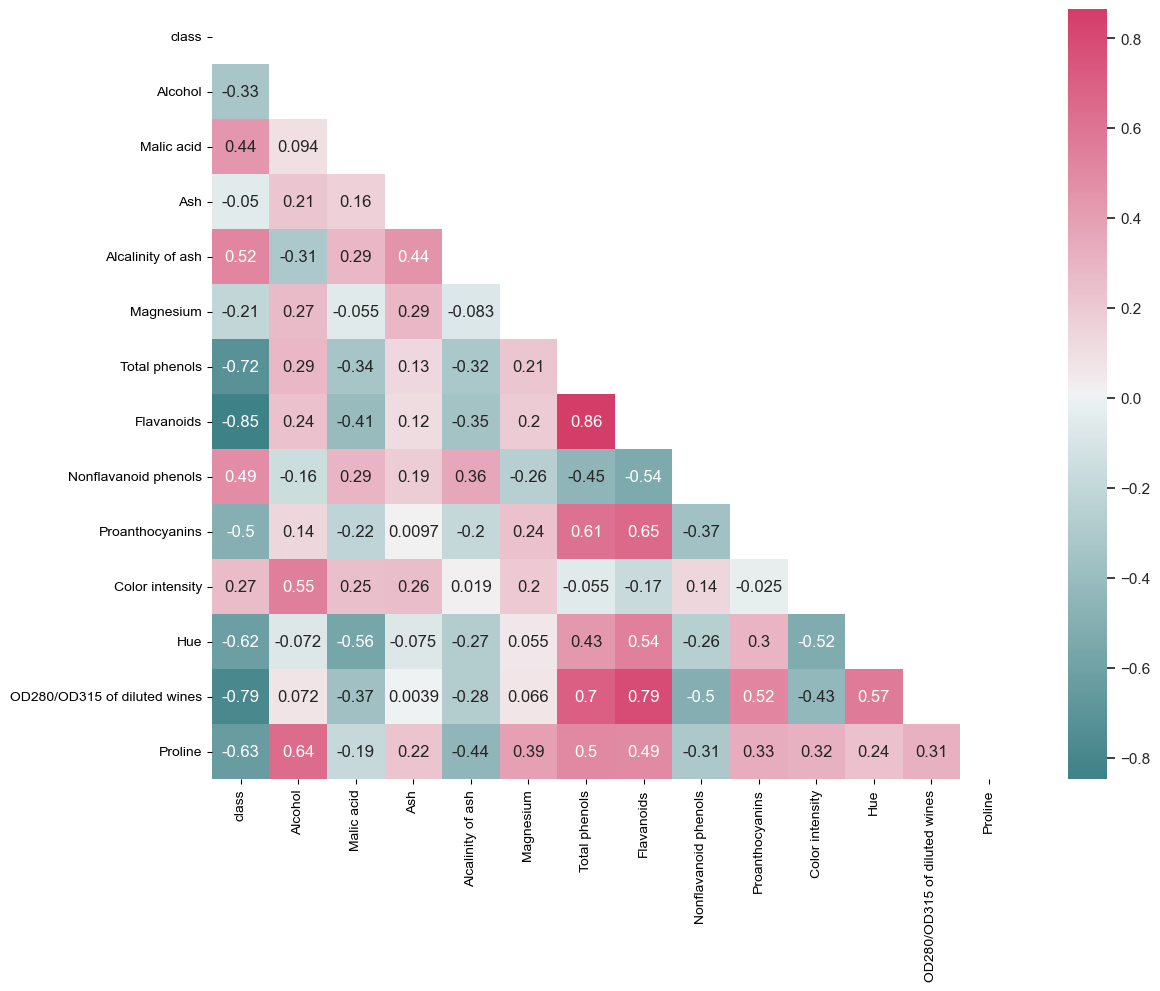

In [9]:
# Comprobamos mediante un heatmap las correlaciones entre las variables
fig, ax = plt.subplots(figsize=(13, 10))
sns.set_theme(style="darkgrid")
cmap = sns.diverging_palette(200, 0, as_cmap=True)
matrix = np.triu(df_wine.corr())
sns.heatmap(df_wine.corr(), annot=True, mask=matrix, cmap=cmap)
plt.show()

<div class="alert alert-info alert-info">

  Tenemos una correlación positiva fuerte entre las variables **Flavanoids**(un tipo de fenoles presentes en el vino) y **Total phenols**(La concentración total de fenoles en el vino) que parece lógica por el significado de ambos atributos.
    
   
</div>

C:\Users\USER\AppData\Local\Temp\ipykernel_14136\2155039868.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


<Figure size 640x480 with 0 Axes>

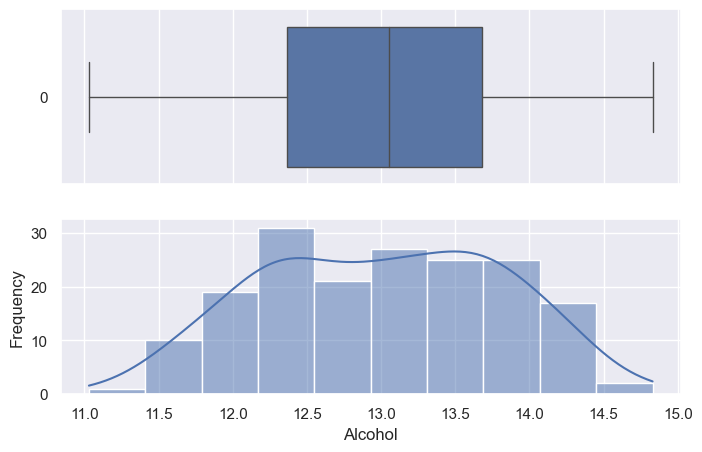

<Figure size 800x500 with 0 Axes>

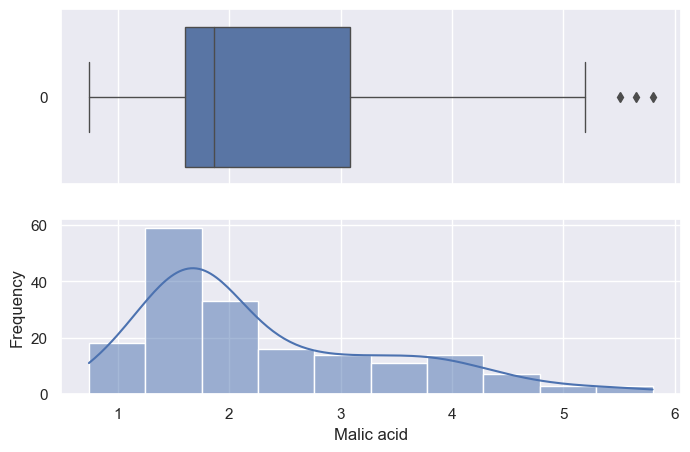

<Figure size 800x500 with 0 Axes>

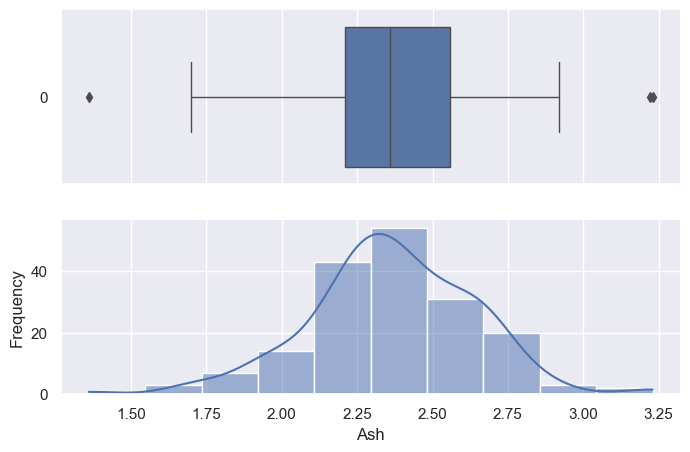

<Figure size 800x500 with 0 Axes>

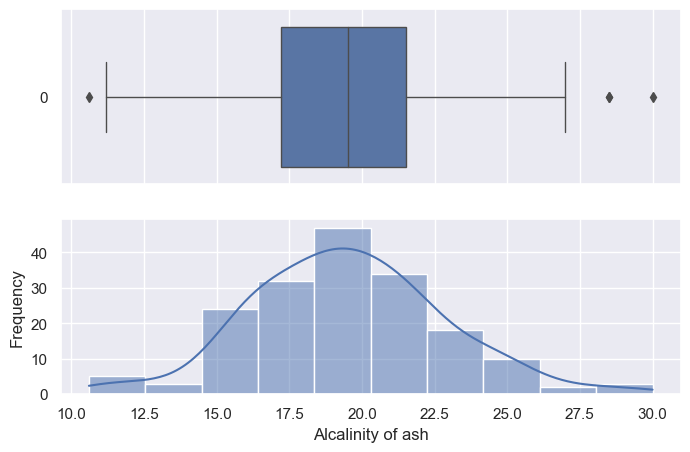

<Figure size 800x500 with 0 Axes>

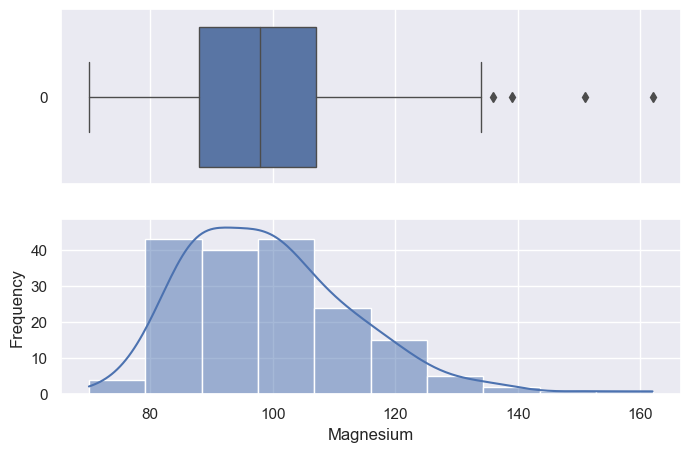

<Figure size 800x500 with 0 Axes>

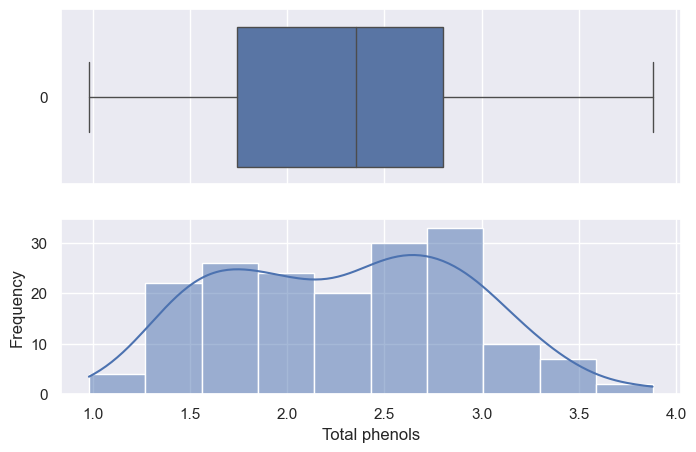

<Figure size 800x500 with 0 Axes>

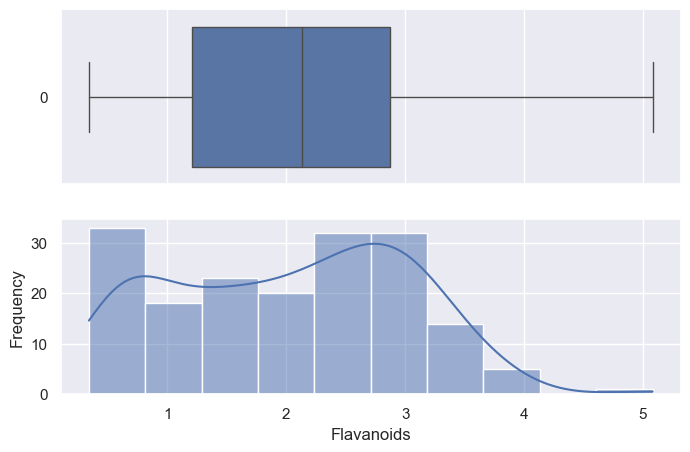

<Figure size 800x500 with 0 Axes>

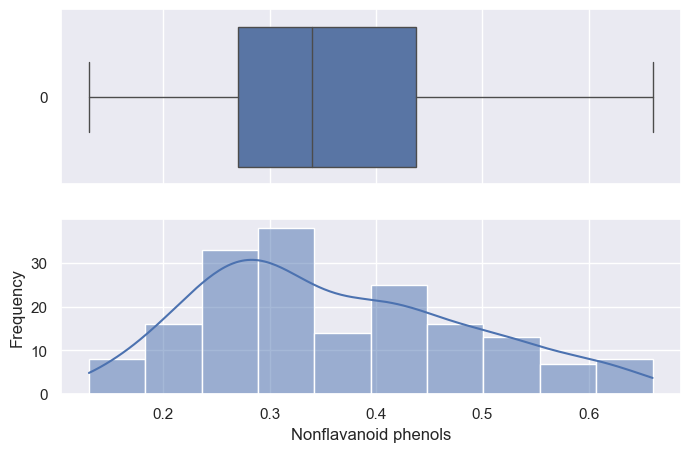

<Figure size 800x500 with 0 Axes>

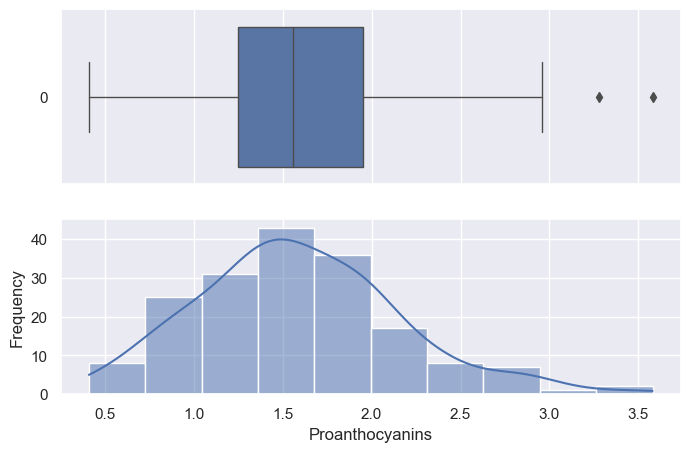

<Figure size 800x500 with 0 Axes>

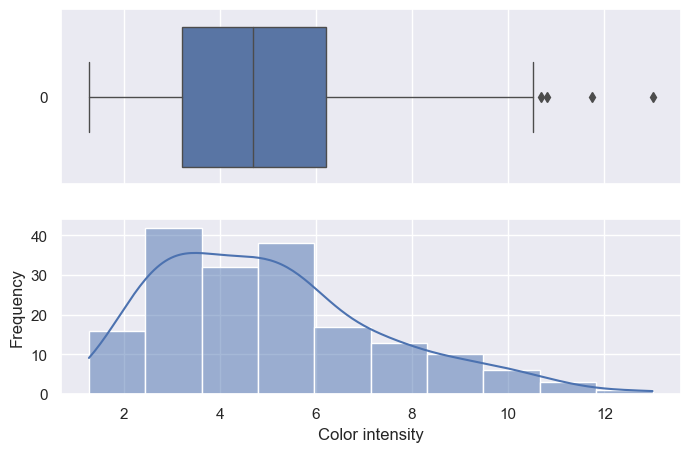

<Figure size 800x500 with 0 Axes>

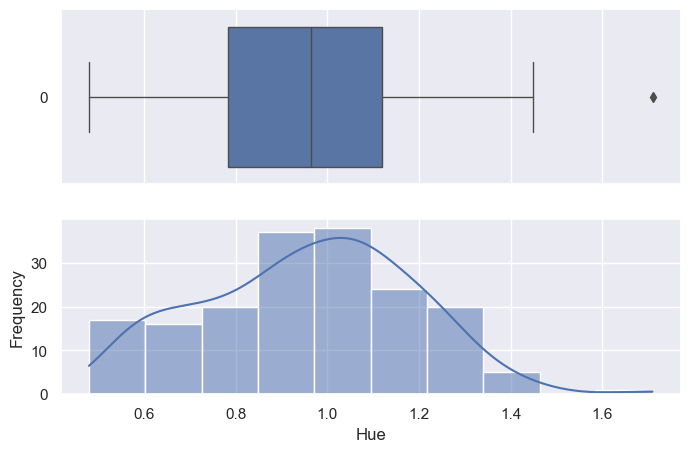

<Figure size 800x500 with 0 Axes>

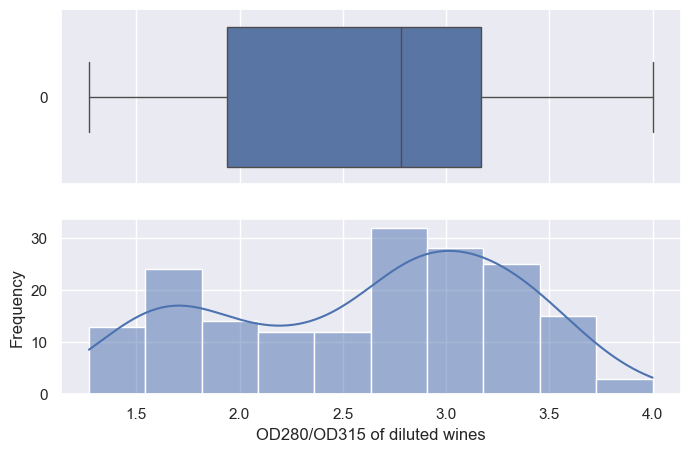

<Figure size 800x500 with 0 Axes>

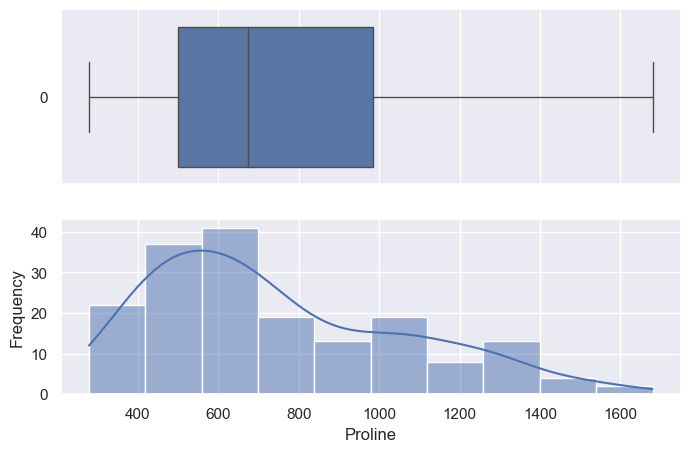

In [10]:
for i in df_wine[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']]:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df_wine[i],  ax=ax_box , orient = 'h', linewidth= 1.0)
    sns.histplot(df_wine[i], ax=ax_hist , bins = 10,kde=True)

<div class="alert alert-info alert-info">

  Tenemos outliers en lo siguientes atributos:**Malic acid**, **Ash**, **Alcalinity of ash**, **Magnesium**,**Proanthocyanins**   ,**Color intensity** y **Hue**. Aparentemente sólo el parámetro **Alcalinity of ash** tiene una distribución normal.
    
  Comprobamos mediante shapiro qué variables presentan distribución gaussinana.
    
</div> 

In [11]:
from scipy.stats import shapiro

def distr_normal(df):
    normal = []
    for col in df.columns:
        p_valor = shapiro(df[col])[1]
        normal.append(p_valor > 0.05) 
    return normal
resultado = distr_normal(df_wine)
print(resultado)

[False, False, False, False, True, False, False, False, False, False, False, False, False, False]


<div class="alert alert-info alert-info">
 
 El atributo **Alcalinity of ash** es el único que presenta una distribución normal.
    
</div> 

<div class="alert alert-info alert-info">
 
Como las medias de los atributos tienen escalas diferentes y además alguna de ellas presenta outliers, lo más óptimo sería escalar todos los atributos para que las que tienen medias más altas no puedan influir en las otra.

Aplicaremos **RobustScaler** a aquellos atributos con outliers, **MinMaxScaler** a los que no tienen outliers sin distribución normal y **StandardScaler** para el atributo **Alcalinity of ash**.
    
Utilizaremos para ello la función ColumTransform.
    
</div> 

In [12]:
# Preparamos los datos y extraemos la variable objetivo
X = df_wine.drop(['class'],axis=1)
y = df_wine['class']

# Transformamos las etiquetas de clase a valores enteros para no tener problemas posteriormente con el xgb.XGBClassifier
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Realizamos la división de los registros en entrenamiento y test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state= 42)
print(len(X_train))
print(len(y_test))

142
36


In [13]:
# Para los parámetros con outliers
robust_wine = RobustScaler()
robust_features = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Proanthocyanins','Color intensity', 'Hue']

# Para los parámetros sin outliers
minmax_wine = MinMaxScaler()
minmax_features = ['Alcohol', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proline']

# Para el parámetro Alcalinity of ash con distribución normal
stand_wine = StandardScaler()
stand_features = ['Alcalinity of ash']

prep_wine = ColumnTransformer(
          transformers= [("RobustWine", robust_wine, robust_features),
                         ("MinMaxWine", minmax_wine, minmax_features),
                         ("StandWine", stand_wine, stand_features)])

# Creamos los modelos a applicar en la clasificación
svc_wine = svm.SVC()
xgb_wine = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))


# Cremos un pipeline para cada uno de los algortimos
svc_pipe_wine = Pipeline([('prep_wine',prep_wine), ('svc_wine', svc_wine)])
xgb_pipe_wine = Pipeline([('prep_wine',prep_wine), ('xgb_wine', xgb_wine)])

In [14]:
# Aplicamos el modelo SVC
svc_pipe_wine.fit(X_train, y_train)
y_pred_svc_wine = svc_pipe_wine.predict(X_test)
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc_wine)
print(f"Precisión Modelo SVC: {accuracy_svc * 100:.2f}%")

Precisión Modelo SVC: 94.44%


In [15]:
# Aplicamos el modelo XGBoost
xgb_pipe_wine.fit(X_train, y_train)
y_pred_xgb_wine = xgb_pipe_wine.predict(X_test)
accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb_wine)
print(f"Precisión Modelo XGBoost: {accuracy_xgb * 100:.2f}%")

Precisión Modelo XGBoost: 97.22%


In [16]:
# Montamos un DataFrame donde ver los resultados y evaluarlos.
evaluation = pd.DataFrame(data=[
    ('SVC', accuracy_svc.round(5)*100),
    ('XGBoost', accuracy_xgb.round(5)*100),
    ],
    columns=['Model','Accuracy'])
evaluation

,Model,Accuracy
0,SVC,94.444
1,XGBoost,97.222


<div class="alert alert-info alert-info">
    
Podemos ver que el modelo **XGBoost** nos dá una exáctitud del 97,2% en comparación la exáctitud del **SVC** del 94,4%, que no siendo mala, es inferior al **XGBoost**
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 2</h1></b>
    
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.
    
</div>

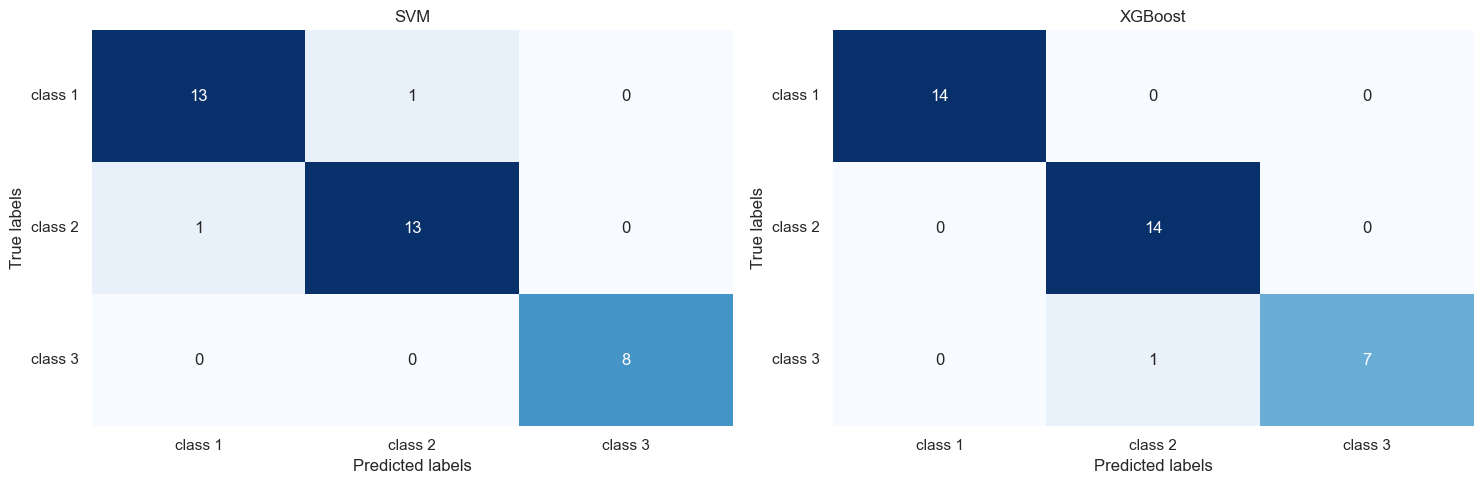

In [17]:
# Creamos una figura para mostrar las 2 matrices de confusión:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Instanciamos una matriz para cada modelo:
svc_wine_mat_con = metrics.confusion_matrix(y_test, y_pred_svc_wine )
xgb_wine_mat_con = metrics.confusion_matrix(y_test, y_pred_xgb_wine )

# Configuramos las clases
Nro_Class = ['class 1','class 2','class 3']
                  
# Heatmap 1
sns.heatmap(svc_wine_mat_con, annot=True, fmt='d', ax=axs[0], cmap='Blues', cbar=False)
axs[0].set_xlabel('Predicted labels')
axs[0].set_ylabel('True labels')
axs[0].set_title('SVM')
axs[0].xaxis.set_ticklabels(Nro_Class)
axs[0].yaxis.set_ticklabels(Nro_Class, rotation=0)

# Heatmap 2
sns.heatmap(xgb_wine_mat_con, annot=True, fmt='d', ax=axs[1], cmap='Blues', cbar=False)
axs[1].set_xlabel('Predicted labels')
axs[1].set_ylabel('True labels')
axs[1].set_title('XGBoost')
axs[1].xaxis.set_ticklabels(Nro_Class)
axs[1].yaxis.set_ticklabels(Nro_Class, rotation=0)


# Mostra la figura
plt.tight_layout()
plt.show()


<div class="alert alert-info alert-info">
    
Losa resultados de las matrices de confusión nos muestran que en el caso del **XGBoost** sólo una de las predicciones ha sido errónea (era clase 3 y se ha predicho una clase 2). En el caso del **SVC** hemos tenido 2 errores.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 3</h1></b>
    
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.
    
</div>

In [18]:
# Obtenemos los parámetros del modelo SVC
svc_wine.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [19]:
# Creamos un diccionario con los parámetros que queremos evaluar
param_svc_wine = [
    {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},  
    {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": ['auto', 'scale']},
    {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1), "gamma": ['auto', 'scale']}  
]

#Creamos una instancia de GridSearchCV y llamamos a un modelo no entrenado de SVC
grid_svc_wine = GridSearchCV(  
    estimator= svm.SVC() ,  
    param_grid=param_svc_wine,   
    scoring = 'accuracy', 
    cv=5,  
    verbose=1 ,  
    n_jobs=-1
)

#Entrenamos el modelo para encontrar los mejores parámetros
grid_svc_wine.fit(X, y) 

Fitting 5 folds for each of 55 candidates, totalling 275 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': ['auto', 'scale'], 'kernel': ['rbf']},
                         {'C': [0.01, 0.1, 1, 10, 100],
                          'degree': array([1, 2, 3, 4]),
                          'gamma': ['auto', 'scale'], 'kernel': ['poly']}],
             scoring='accuracy', verbose=1)

In [20]:
# Vemos la mejor puntuación de accuracy en la validación cruzada.
print(grid_svc_wine.best_score_)

0.9666666666666668


In [21]:
# Vemos el diccionario con los mejores parámetros encontrados en la validación cruzada.
print(grid_svc_wine.best_params_)

{'C': 1, 'degree': 1, 'gamma': 'auto', 'kernel': 'poly'}


In [22]:
# Creamos el modelo a applicar en la clasificación con los mejores parámetros
svc_wine_best = svm.SVC(kernel = 'poly', C=1.0, degree = 1, gamma = 'auto')


# Cremos un pipeline y lo entrenamos
svc_pipe_wine_best = Pipeline([('prep_wine',prep_wine), ('svc_wine_best', svc_wine_best)])
svc_pipe_wine_best.fit(X_train, y_train)

# Calculamos las predicciones con los mejores parámetros
y_pred_svc_wine_best = svc_pipe_wine_best.predict(X_test)
accuracy_svc_best = metrics.accuracy_score(y_test, y_pred_svc_wine_best)
print(f"Precisión Modelo SVC con los mejores parámetros: {accuracy_svc_best * 100:.2f}%")

Precisión Modelo SVC con los mejores parámetros: 91.67%


In [23]:
# Obtenemos los parámetros del modelo XGBoost
xgb_wine.get_params()

{'objective': 'multi:softmax',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 3}

In [24]:
# Creamos un diccionario con los parámetros que queremos evaluar
param_xgb_wine = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0.5, 1, 1.5]
}

#Creamos una instancia de GridSearchCV
grid_xgb_wine = GridSearchCV(  
    estimator= xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_)),  
    param_grid=param_xgb_wine,   
    scoring = 'accuracy', 
    cv=5,  
    verbose=1 ,  
    n_jobs=-1
)

#Entrenamos el modelo para encontrar los mejores parámetros
grid_xgb_wine.fit(X, y) 

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, num_class=3,
                                     num_parallel_tree=None,
                                     objective='multi:softmax', ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'reg_alpha': [0, 0.1, 0.5],
                         'reg_lambda': [0.5, 1, 1.5]},
             scoring='accuracy', verbose=1)

In [25]:
# Vemos la mejor puntuación de accuracy en la validación cruzada.
print(grid_xgb_wine.best_score_)

0.9609523809523809


In [26]:
# Vemos el diccionario con los mejores parámetros encontrados en la validación cruzada.
print(grid_xgb_wine.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'reg_alpha': 0, 'reg_lambda': 0.5}


In [27]:
# Creamos el modelo a applicar en la clasificación con los mejores parámetros
xgb_wine_best =xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_),learning_rate = 0.1,max_depth=3,
                                min_child_weight = 1, n_estimators = 100, reg_alpha = 0, reg_lambda = 0.5 )


# Cremos un pipeline y lo entrenamos
xgb_pipe_wine_best = Pipeline([('prep_wine',prep_wine), ('xgb_wine_best', xgb_wine_best)])
xgb_pipe_wine_best.fit(X_train, y_train)

# Calculamos las predicciones con los mejores parámetros
y_pred_xgb_wine_best = xgb_pipe_wine_best.predict(X_test)
accuracy_xgb_best = metrics.accuracy_score(y_test, y_pred_xgb_wine_best)
print(f"Precisión Modelo XGBoost con los mejores parámetros: {accuracy_xgb_best * 100:.2f}%")

Precisión Modelo XGBoost con los mejores parámetros: 97.22%


In [28]:
# Actualizamos el DataFrame de evaluación.
evaluation = pd.DataFrame(data=[
    ('SVC', accuracy_svc.round(5)*100,accuracy_svc_best.round(5)*100),
    ('XGBoost', accuracy_xgb.round(5)*100, accuracy_xgb_best.round(5)*100),
    ],
    columns=['Model','Accuracy','Accuracy mejores parámetros' ])
evaluation

,Model,Accuracy,Accuracy mejores parámetros
0,SVC,94.444,91.667
1,XGBoost,97.222,97.222


<div class="alert alert-info alert-info">
    
Podemos ver que el modelo **SVC** empeora su rendimiento respecto a los parámetros por defecto y se mantiene en el modelo **XGBoost**
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 4</h1></b>
    
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.
    
</div>

In [29]:
# Creamos nuevas instancias de los modelos sin entrenar y parámetros por defecto
svc_wine_ren = svm.SVC()
xgb_wine_ren = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_))

In [30]:
# Creamos nuevas instancias de los modelos sin entrenar y mejores parámetros
svc_wine_ren_best = svm.SVC(kernel = 'poly', C=1.0, degree = 1, gamma = 'auto')
xgb_wine_ren_best = xgb.XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_),learning_rate = 0.1,max_depth=3,
                                min_child_weight = 1, n_estimators = 100, reg_alpha = 0, reg_lambda = 0.5 )

In [31]:
# Obtenemos el rendimiento de los modelos con los parámetros por defecto.
svc_cro_val = cross_val_score(svc_wine_ren , X, y, cv=5)
xgb_cro_val = cross_val_score(xgb_wine_ren , X, y, cv=5)

In [32]:
# Obtenemos el rendimiento de los modelos con los mejores parámetros.
svc_cro_val_best = cross_val_score(svc_wine_ren_best , X, y, cv=5)
xgb_cro_val_best = cross_val_score(xgb_wine_ren_best , X, y, cv=5)

In [33]:
# Sacamos la media y la desviación estandar de todas las instancias de validación cruzada.
svc_mean_score = np.mean(svc_cro_val)
xgb_mean_score = np.mean(xgb_cro_val)

svc_mean_score_best = np.mean(svc_cro_val_best)
xgb_mean_score_best = np.mean(xgb_cro_val_best)

In [34]:
# Añadimos los resultados al DataFrame "evaluation"
evaluation = pd.DataFrame(data=[
    ('SVC', accuracy_svc.round(5)*100,accuracy_svc_best.round(5)*100,svc_mean_score.round(5)*100,svc_mean_score_best.round(5)*100),
    ('XGBoost', accuracy_xgb.round(5)*100, accuracy_xgb_best.round(5)*100,xgb_mean_score.round(5)*100,xgb_mean_score_best.round(5)*100),
    ],
    columns=['Model','Accuracy','Accuracy mejores parámetros','Mean Accuracy Val. Cruzada', 'Mean Accuracy Val. Cruzada mejores parámetros'])
evaluation

,Model,Accuracy,Accuracy mejores parámetros,Mean Accuracy Val. Cruzada,Mean Accuracy Val. Cruzada mejores parámetros
0,SVC,94.444,91.667,66.349,96.667
1,XGBoost,97.222,97.222,94.984,96.095


<div class="alert alert-info alert-info">
    
Al realizar la validación cruzada podemos ver que ambos modelos tienen un mejor coomportamiento con los ejores parámetros, siendo en este caso la media superior para el modelo **SVC** aunque por una diferencia mínima.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 5</h1></b>
    
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)
    
</div>

<div class="alert alert-info alert-info">
    
Dentro de las posibilidades de los procesos de ingeniería, ya hemos realizado el paso por normalización y estandarización de los datos con la aplicación de **StandardScaler**, **MinMaxScaler** y **RobustScaler**. 

También hemos aplicado el algortimo **XGBoost** que maneja bien el desequilibrio entre clases (tenemos una distribución de 59, 71 y 48 para las clases 1, 2 y 3 respectivamente).
    
Hemos aplicado validación cruzada y ajuste de los mejores parámetros con GridSearchCV, por lo que nos queda sería comprobar si la alta correlación entre algunos de los atributos puedes hacer que el modelo no funcione mejor al aportar multicolinealidad.
    
    
</div>

<div class="alert alert-info alert-info">
 
Aplicaremos las técnicas **PCA** (nos ayuda a reducir la dimensionalidad y elimina la correlación entre variables). 
    
</div>

In [35]:
# Creamos de nuevo los pipeline incluyendo el PCA como nuevo step en ambos modelos

svc_pipe_wine_best_pca = Pipeline([('prep_wine',prep_wine),('pca_svc_wine', PCA(n_components = 0.99)), ('svc_wine_ren_best', svc_wine_ren_best)])
svc_cro_val_best_pca = cross_val_score(svc_pipe_wine_best_pca, X, y, cv=5)
svc_mean_score_best_pca = np.mean(svc_cro_val_best_pca)

xgb_pipe_wine_best_pca = Pipeline([('prep_wine',prep_wine),('pca_xgb_wine', PCA(n_components = 0.99)), ('xgb_wine_ren_best', xgb_wine_ren_best)])
xgb_cro_val_best_pca = cross_val_score(xgb_pipe_wine_best_pca, X, y, cv=5)
xgb_mean_score_best_pca = np.mean(xgb_cro_val_best_pca)

In [36]:
# Añadimos los resultados al DataFrame "evaluation"
evaluation = pd.DataFrame(data=[
    ('SVC', accuracy_svc.round(5)*100,accuracy_svc_best.round(5)*100,
            svc_mean_score.round(5)*100,svc_mean_score_best.round(5)*100,
            svc_mean_score_best_pca.round(5)*100),
    ('XGBoost', accuracy_xgb.round(5)*100, accuracy_xgb_best.round(5)*100,
            xgb_mean_score.round(5)*100, xgb_mean_score_best.round(5)*100,
            xgb_mean_score_best_pca.round(5)*100),
    ],
    columns=['Model','Accuracy','Accuracy mejores parámetros','Mean Accuracy Val. Cruzada', 
             'Mean Accuracy Val. Cruzada mejores parámetros', 'Mean Accuracy Val. Cruzada con PCA'])
evaluation

,Model,Accuracy,Accuracy mejores parámetros,Mean Accuracy Val. Cruzada,Mean Accuracy Val. Cruzada mejores parámetros,Mean Accuracy Val. Cruzada con PCA
0,SVC,94.444,91.667,66.349,96.667,92.111
1,XGBoost,97.222,97.222,94.984,96.095,93.286


<div class="alert alert-info alert-info">
    
Podemos ver que mediante PCA no se ha mejorado el rendimiento del modelo en la validación cruzada, por lo que podemos decir que posiblemente mediante su aplicación hemos perdido información relevante para este problema.
    
</div>